In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load OR-Tools result
with open("sample_output.json") as f:
    ortools_data = json.load(f)

# Load Greedy
with open("sample_output_greedy.json") as f:
    greedy_data = json.load(f)

# Helper to convert routes to DataFrame
def extract_routes(data, solver_name):
    rows = []
    for route in data["routes"]:
        rows.append({
            "Solver": solver_name,
            "Vehicle": route["vehicle_id"],
            "Time": route["total_delivery_time"],
            "Distance": route["total_distance"],
            "Late Deliveries": route["late_deliveries"],
            "Parcels Delivered": route["parcels_delivered"]
        })
    return pd.DataFrame(rows)

df_ortools = extract_routes(ortools_data, "OR-Tools")
df_greedy = extract_routes(greedy_data, "Greedy")

df_all = pd.concat([df_ortools, df_greedy], ignore_index=True)
df_all

,Solver,Vehicle,Time,Distance,Late Deliveries,Parcels Delivered
0,OR-Tools,1,9,9,0,2
1,OR-Tools,2,4,4,0,1
2,Greedy,1,6,6,0,2
3,Greedy,2,8,8,0,1


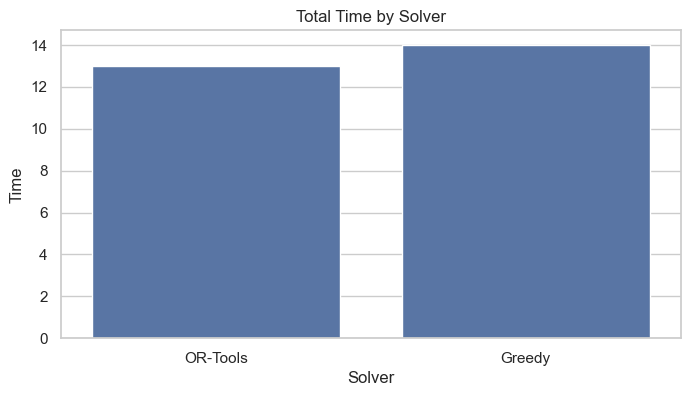

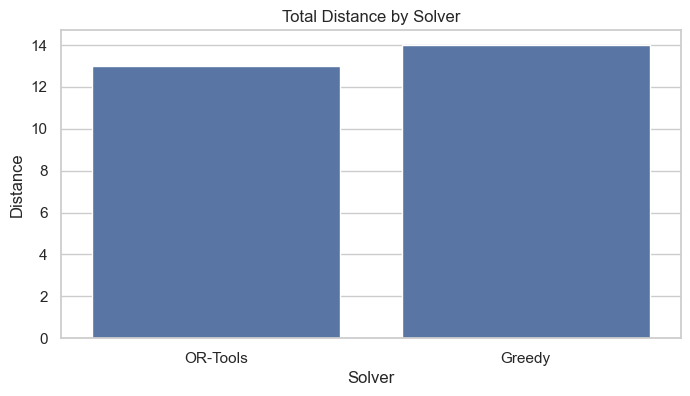

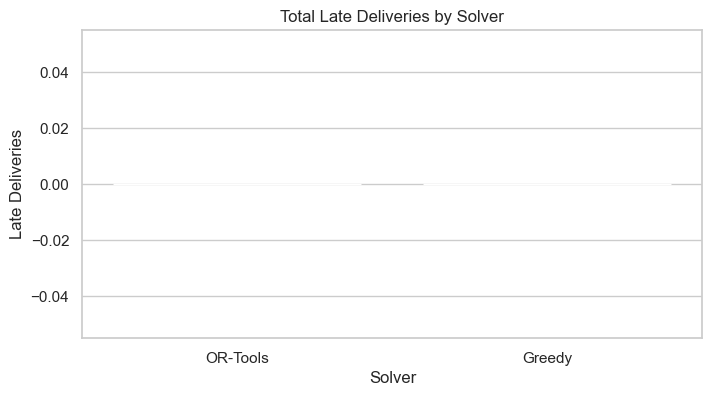

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
metrics = ["Time", "Distance", "Late Deliveries"]

for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_all, x="Solver", y=metric, estimator=sum, errorbar=None)
    plt.title(f"Total {metric} by Solver")
    plt.ylabel(metric)
    plt.show()

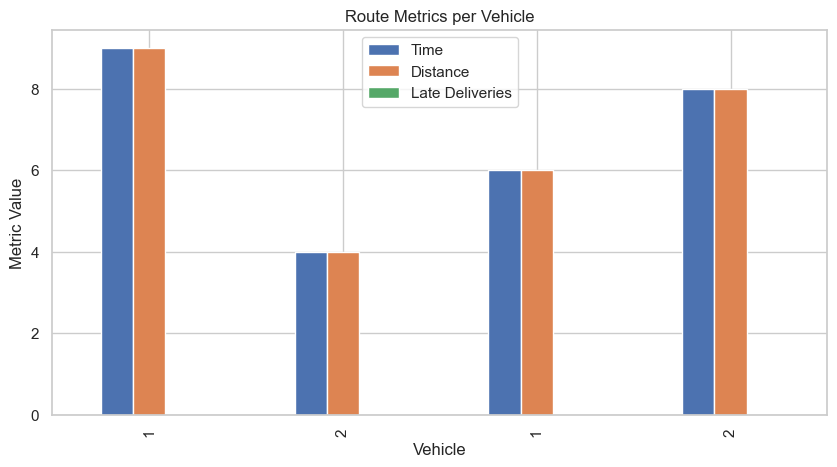

In [16]:
sns.set(style="whitegrid")
df_all.set_index("Vehicle")[["Time", "Distance", "Late Deliveries"]].plot(kind="bar", figsize=(10, 5))
plt.title("Route Metrics per Vehicle")
plt.ylabel("Metric Value")
plt.xlabel("Vehicle")
plt.show()